# Entregável Hands-On 06 - William Soares


## 1) Passos 1 e 2 da Prática 2 (Reconstrução ideal do sinal amostrado)

## Descrição:
Reconstrução ideal do sinal amostrado. Comite o arquivo Entrega_h06.ipynb com os códigos rodados (Matlab e Python) e com os gráficos aparecendo e os comentários realizados. Se precisar repita trechos inteiros de código para que o documento fique autocontido. As figuras devem ser resultado da execução do código e não figuras inseridas em formato png ou jpg.

Com a análise dos gráficos da prática 2, nota-se que o sinal recuperado não é igual ao sinal original, pois com a banda do filtro interpolador em B = 100 Hz, apenas a componente senoidal de m(t) em f = 80 Hz é recuperado, fazendo com que a componente em f = 200 Hz sejá perdida. 

A solução para esse problema é aumentar a banda do filtro fazendo com que todo o espectro do sinal m(t) seja contido, sendo assim, escolhi uma banda de 300 Hz que está de acordo com a taxa de Nyquist de B > 200 Hz que garante que nenhuma componente sejá perdida na reconstrução.

Os códigos abaixo tanto em Matlab quanto em Python foi alterado para que garantir o que foi dito acima. 




-> Código em Matlab

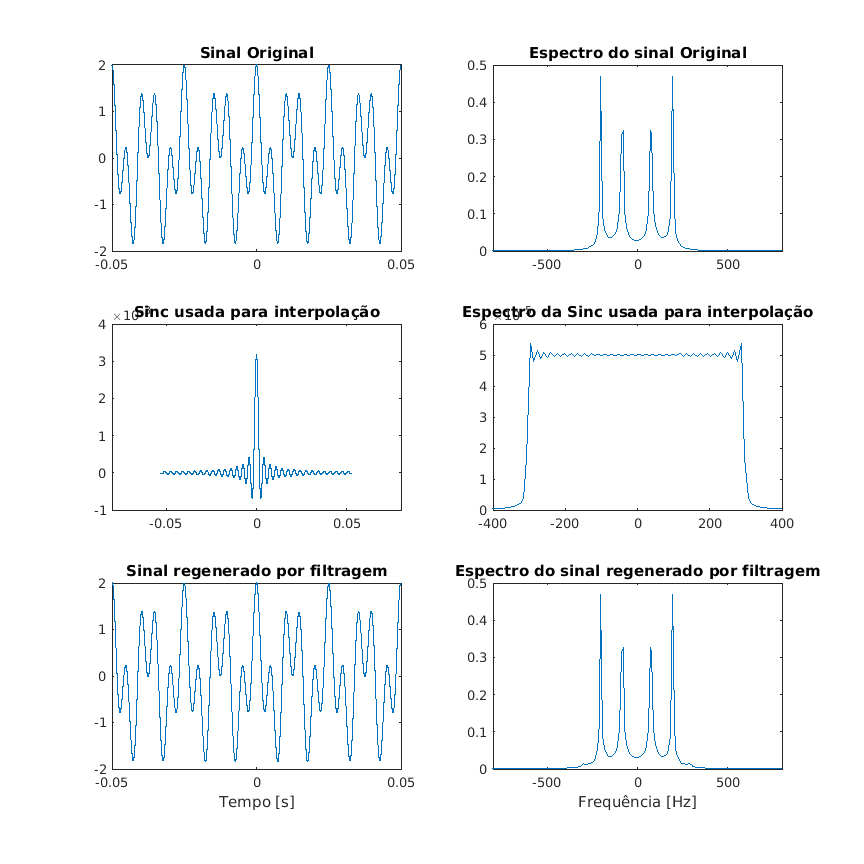

In [4]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=300;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-800 800 0 0.5]);
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3);                                      
plot(t,s);
title('Sinc usada para interpolação');
axis([-0.08 0.08 -1e-3 4e-3]);
% Plot do Sinc na frequência                   
subplot(3,2,4);
plot(freq,abs(S));       
title('Espectro da Sinc usada para interpolação');
axis([-400 400 0 6e-5]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);
plot(t,c);      
title('Sinal regenerado por filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);
plot(freq,abs(C));
title('Espectro do sinal regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-800 800 0 0.5]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];


-> Código em Python

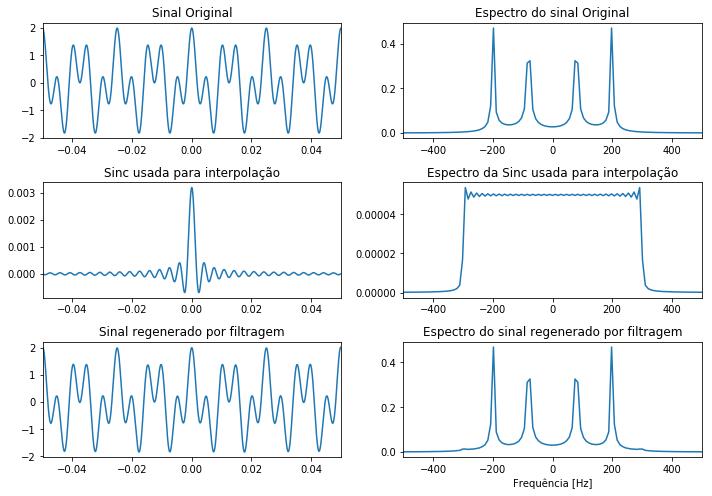

In [21]:
from scipy.fftpack import fft, fftshift
import numpy as np
from matplotlib import pyplot as plt

## Parâmetros da Sinc
B=300                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                       # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
## Espectros
lfft=len(s)                                                # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,Fs/2 +1 -Fs/lfft,Fs/lfft)           # Eixo da frequência (módificado +1 )
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("Sinc usada para interpolação")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("Espectro da Sinc usada para interpolação")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()

## 2) Prática 3 (Quantização)

## Descrição:
Comite o arquivo Entrega_h06.ipynb com os códigos rodados e com os gráficos e os resultados numéricos aparecendo. Inclua as discussões no próprio documento e não no trecho de código. Se precisar repita trechos inteiros de código para que o documento fique autocontido. As figuras devem ser resultado da execução do código e não figuras inseridas em formato png ou jpg. Esse tem dois subitens (especificados ao final da Prática 3). Cuidado com isso!!!

## Parte 1:
Implemente a SQNR para os sinais quantizados neste experimento. Seu código deve incluir o valor da SQNR no título de cada gráfico! Responda e evidencie no seu experimento: quantos níveis são necessários para atingir uma SQNR de aproximadamente 48.5 dB? Faça o código em Matlab e em Python.

Observa-se pelos gráficos que são necessários 256 níveis para atingir uma SQNR de aproximadamente 48,5 dB.

-> Código em Matlab


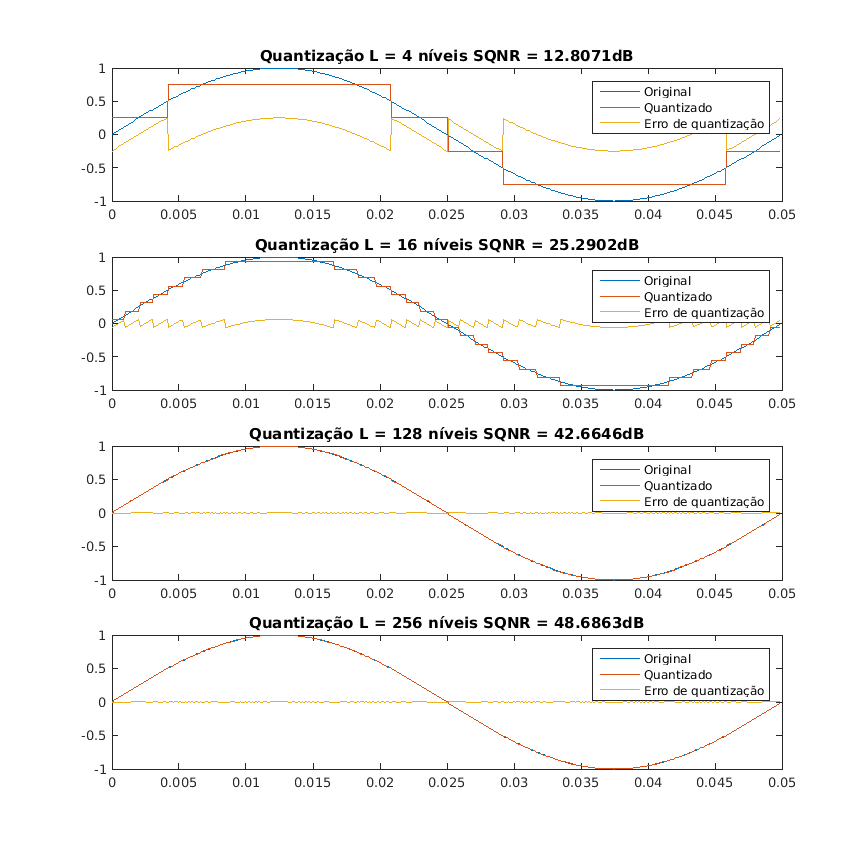

In [5]:
clc; clear all;close all;
%% Parâmetros
fs=8000;                                            % Frequência de amostragem
Ts=1/fs;                                            % Período de amostragem
fm=20;                                              % Frequência da onda
Tm=1/fm;                                            % Período de amostragem
t=0:Ts:Tm-Ts;                                       % Eixo do tempo
m_t=sin(2*pi*20*t);                                 % Sinal m(t)
L= [ 4 16 128 256];                                   % Vetor com níveis de quantização

sig_max=max(m_t);                                   % Encontra pico máximo
sig_min=min(m_t);                                   % Encontra pico mínimo

%% Quantização com round() para cada nível de quantização especificado
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];
for il = 1:length(L)
    Li = L(il);
    Delta=(sig_max-sig_min)/Li;                     % Intervalo de quantização (separação entre um nível e outro)
    q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;  % Vetor com amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    %
    sigp=m_t-sig_min;                               % Deixa o sinal somente com amplitudes positivas (shift para cima)
    
    % Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta);                            
    sigp=sigp+1/2;                                  % Tira elementos do zero
    
    % Agora que nenhum valor do sinal agora é zero nem negativo: isso é importante para que o vetor comece de 1
    qindex=round(sigp);                             % Encontra inteiro mais proximo para cada elemento
    qindex=min(qindex,Li);                          % Trunca o excedente de qindex
    q_out=q_level(qindex);                          % Calcula a amplitude quantizada de cada amostra
    sqnrdb=20*log10(norm(m_t)/norm(m_t-q_out));
    
    % Gráficos
    subplot(length(L),1,il)
    plot (t,m_t,t,q_out,t,(m_t-q_out));
    legend('Original', 'Quantizado','Erro de quantização');
    title(['Quantização L = ' num2str(Li) ' níveis SQNR = ' num2str(sqnrdb) 'dB' ]);
end


-> Código em Python

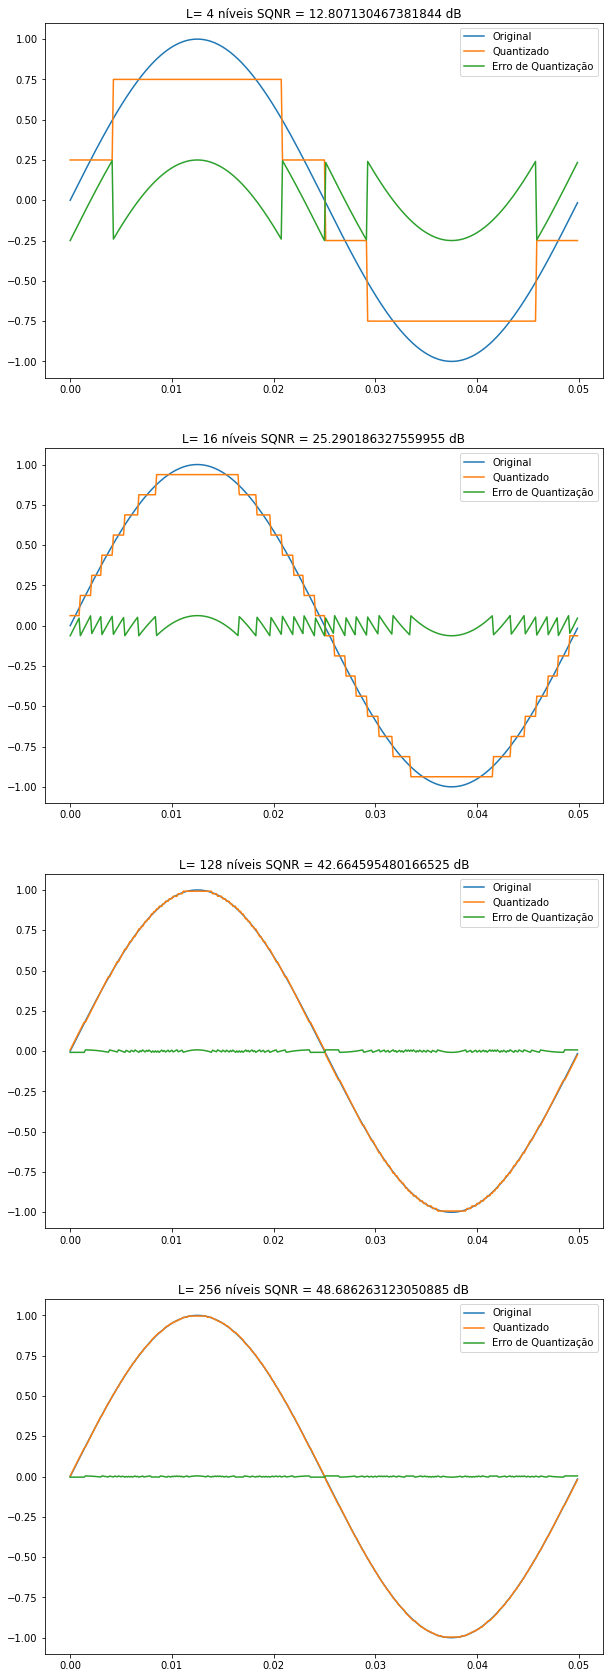

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [ 4, 16, 128, 256 ];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,30])
# Quantização com round() para cada nível de quantização especificado

for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 
    # Agora que nenhum valor do sinal  é zero nem negativo:
    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento       
    sqnr=20*np.log10(np.linalg.norm(m_t)/np.linalg.norm(m_t-q_out)) # Calculo da SQNR
    
    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('L= {} níveis'.format(Li)+' SQNR = {} dB'.format(sqnr))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    
plt.show()

## Parte 2:
Implemente um código em Python que abra o sinal da Prática 1 e faça sua quantização usando 8, 32, 128 níveis. Faça o processo de reconstrução ideal do sinal (qualquer método) usando o sinal quantizado. Calcule a SQNR de cada caso e evidencie como é a qualidade da reconstrução do sinal (tempo e frequência) para cada nível de quantização especificado.

Para atender ao itém, é feita a quantização usando 8, 32 e 128 níveis do sinal da prática 1 e logo após é feita a reconstrução do sinal, usando o sinal quantizado. Observe também que a SQNR de cada caso, foi calculada. Seque abaixo o código com a implementação em Python.

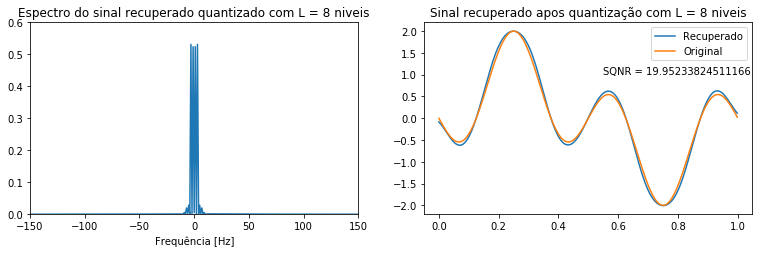

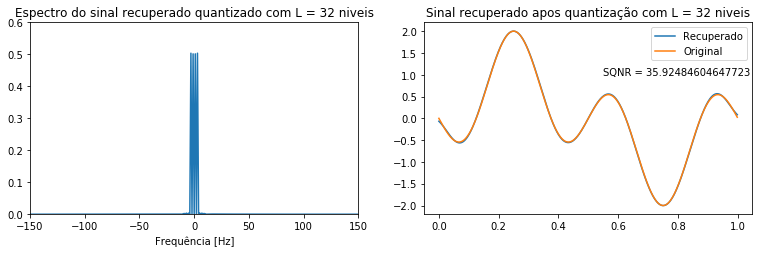

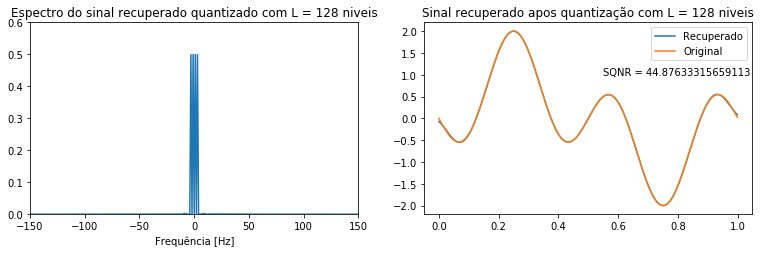

In [4]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft

# Importa o sinal
variaveis = loadmat('/home/labsim/william_DCO2004/Entregaveis_do_Hands-on_06/amostragem.mat')
T = float(variaveis['T'])
lfft = int(variaveis['lfft'])
N_samp = int(variaveis['N_samp'])
S_out = variaveis['S_out'].flatten()
s_out = variaveis['s_out'].flatten()
m_t = variaveis['m_t'].flatten()
t = variaveis['t'].flatten()
freq = variaveis['freq'].flatten()
Bs = fm1 = float(variaveis['fm1'])
L = [8, 32, 128]    # Niveis de quantização

sig_max=max(m_t)    # Encontra pico máximo
sig_min=min(m_t)    # Encontra pico mínimo

# Quantização de m_t
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
   
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp=sigp*(1/Delta)                                
    sigp=sigp + 1/2 +0.0001                          # Tira elementos do zero 

    qindex=np.round(sigp)                            # Encontra inteiro mais proximo para cada elemento
    qindex[qindex>Li] = Li                           # Trunca o excedente de qindex 
    qindex = qindex.astype(int)                      # Casting para inteiro (garantindo que é do tipo inteiro)
    q_out=q_level[abs(qindex-1)]                     # Distribui nos níveis cada elemento 
    

    # Gera laço para somatório
    Tsinc = 0.002                                                # Passo de tempo da sinc
    Tfsinc = 50                                                  # Tempo Final da sinc
    tsinc = np.arange(0,Tfsinc,Tsinc)                            # Eixo de tempo da sinc
    nSamples = len(q_out)                                        # Mede-se o comprimento do sinal
    xSamples = np.arange(0,nSamples)                             # Vetor ordenado de amostras
    q_recvSinc=0
    
    for ik in xSamples:      
        Nx_sinc = q_out[ik]*np.sinc(2*np.pi*Bs*(tsinc-ik*T))     # Cria sinc para a amostra ik
        q_recvSinc = q_recvSinc+Nx_sinc                          # Faz somatórios das sincs
    
    q_recvSinc = q_recvSinc[0:lfft]                              # Corrige comprimento do vetor
    q_recvSinc = q_recvSinc*(np.max(m_t)/np.max(q_recvSinc))     # Ajusta o ganho
    Q_recvSinc = fftshift(fft(q_recvSinc,lfft)/lfft)
    
    # Calculo de SQNR (dB)
    SQNR1 = np.mean(20*np.log10(np.abs(m_t[1:124])/(np.abs(m_t[1:124]-q_recvSinc[1:124]))))
    SQNR2 = np.mean(20*np.log10(np.abs(m_t[126:])/(np.abs(m_t[126:]-q_recvSinc[126:]))))
    SQNR = np.mean([SQNR1, SQNR2])
    
    # Plot sinal recuperado
    plt.figure(1,[20,12])
    plt.subplot(331)
    plt.plot(freq,abs(Q_recvSinc))
    plt.title("Espectro do sinal recuperado quantizado com L = {} niveis".format(Li))
    plt.xlabel("Frequência [Hz]")
    plt.xlim([-150,150])
    plt.ylim([0,0.6])
    
    # Plota sinal regenerado
    plt.subplot(332)
    plt.plot(t,q_recvSinc[:lfft],t,m_t)
    plt.text(.55, 1, r'SQNR = {}'.format(SQNR))
    plt.title("Sinal recuperado apos quantização com L = {} niveis".format(Li))
    plt.legend(["Recuperado", "Original"])
    plt.show()
    
plt.show()

## 3) Prática 4 (Multiplexação e demultiplexação (TDM))

## Descrição:
Comite o arquivo Entrega_h06.ipynb com os códigos rodados e com os gráficos e os resultados numéricos aparecendo. Inclua as discussões no próprio documento e não no trecho de código. Se precisar repita trechos inteiros de código para que o documento fique autocontido. As figuras devem ser resultado da execução do código e não figuras inseridas em formato png ou jpg.

Desejamos montar uma estação central para o monitoramento simultâneo do eletrocardiograma de 5 pacientes hospitalizados, como ilustra a figura a seguir. Os dados dos 5 pacientes são levados ao centro de processamento, são amostrados, quantizados, codificados para binário e multiplexados por divisão no tempo. Os dados multiplexados são, então, transmitidos à estação de monitoramento em PCM via cabo.

Os 5 sinais a serem multiplexados são disponibilizados nesse link. Nesse arquivo também está disponível a taxa de amostragem que os sinais foram gerados. Monte seu sistema com as seguintes especficações:

- Amostragem/reconstrução: Construa um sinal amostrado retornando a zero usando downsampling e upsampling com N = 10. A maior frequência dos sinais a serem multiplexados é de 50 Hz;
- Quantização e Codificação: Quantize e codifique os sinais com 8 bits;
- Multiplexador: Por entrelaçamento de palavras de 8 bits.

Faça seu código e mostre os gráficos dos 5 sinais originais e depois da reconstrução no receptor. Use Python ou Matlab.

In [ ]:
close all; clear all; clc;

%% Parâmetros Iniciais
N=10;                           
load('Pacientes.mat')
Ts=1/Fs;
Tfinal=length(sinal_1)/Fs;
t=0:Ts:Tfinal-Ts;
n=8;                                   % Numero de bits
L=2^n;                                 % Numero de niveis de quantizacao

%% Amostragem

%% Amostragem do Sinal 1 
s1_sampl = downsample(sinal_1,N);      % Coleta 1 amostra a cada N amostras do sinal
s1_sampl = upsample(s1_sampl,N);       % Retorna um vetor amostrado com o n0 de elementos
%% Amostragem do Sinal 2 
s2_sampl = downsample(sinal_2,N);      % Coleta 1 amostra a cada N amostras do sinal
s2_sampl = upsample(s2_sampl,N);       % Retorna um vetor amostrado com o n0 de elementos
%% Amostragem do Sinal 3 
s3_sampl = downsample(sinal_3,N);      % Coleta 1 amostra a cada N amostras do sinal
s3_sampl = upsample(s3_sampl,N);       % Retorna um vetor amostrado com o n0 de elementos
%% Amostragem do Sinal 4 
s4_sampl = downsample(sinal_4,N);      % Coleta 1 amostra a cada N amostras do sinal
s4_sampl = upsample(s4_sampl,N);       % Retorna um vetor amostrado com o n0 de elementos
%% Amostragem do Sinal 5 
s5_sampl = downsample(sinal_5,N);      % Coleta 1 amostra a cada N amostras do sinal
s5_sampl = upsample(s5_sampl,N);       % Retorna um vetor amostrado com o n0 de elementos


%% Quantizacao

%% Quantização do Sinal 1
s_min1=min(s1_sampl)                             % Encontra o pico mínimo
s_max1=max(s1_sampl)                             % Encontra o pico máximo
D=(s_max1-s_min1))/L;                            % Intervalo de Quantizacao
q_level1=min(s1_sampl)+D/2:D:max(s1_sampl)-D/2;  % Vetor com amplitudes dos Q níveis 
s_quan1= s1_sampl-min(s1_sampl);                 % Todos elementos positivos
s_quan1= s_quan1/D;                              % Divide pelo intervalo para calular niveis
s_quan1= s_quan1+1/2;                            % Tira do zero
s_quan1= round(s_quan1);                         % Arredonda para o maix proximo
s_quan1= min(s_quan1,L);                         % Trava os valores excedentes em L

%% Quantização do Sinal 2
s_min2=min(s2_sampl)                             % Encontra o pico mínimo
s_max2=max(s2_sampl)                             % Encontra o pico máximo
D=(s_max2-s_min2))/L;                            % Intervalo de Quantizacao
q_level2=min(s2_sampl)+D/2:D:max(s2_sampl)-D/2;  % Vetor com amplitudes dos Q níveis 
s_quan2= s2_sampl-min(s2_sampl);                 % Todos elementos positivos
s_quan2= s_quan2/D;                              % Divide pelo intervalo para calular niveis
s_quan2= s_quan2+1/2;                            % Tira do zero
s_quan2= round(s_quan2);                         % Arredonda para o maix proximo
s_quan2= min(s_quan2,L);                         % Trava os valores excedentes em L

%% Quantização do Sinal 3
s_min3=min(s3_sampl)                             % Encontra o pico mínimo
s_max3=max(s3_sampl)                             % Encontra o pico máximo
D=(s_max3-s_min3))/L;                            % Intervalo de Quantizacao
q_level3=min(s3_sampl)+D/2:D:max(s3_sampl)-D/2;  % Vetor com amplitudes dos Q níveis 
s_quan3= s3_sampl-min(s3_sampl);                 % Todos elementos positivos
s_quan3= s_quan3/D;                              % Divide pelo intervalo para calular niveis
s_quan3= s_quan3+1/2;                            % Tira do zero
s_quan3= round(s_quan3);                         % Arredonda para o maix proximo
s_quan3= min(s_quan3,L);                         % Trava os valores excedentes em L

%% Quantização do Sinal 4
s_min4=min(s4_sampl)                             % Encontra o pico mínimo
s_max4=max(s4_sampl)                             % Encontra o pico máximo
D=(s_max4-s_min4))/L;                            % Intervalo de Quantizacao
q_level4=min(s4_sampl)+D/2:D:max(s4_sampl)-D/2;  % Vetor com amplitudes dos Q níveis 
s_quan4= s4_sampl-min(s4_sampl);                 % Todos elementos positivos
s_quan4= s_quan4/D;                              % Divide pelo intervalo para calular niveis
s_quan4= s_quan4+1/2;                            % Tira do zero
s_quan4= round(s_quan4);                         % Arredonda para o maix proximo
s_quan4= min(s_quan4,L);                         % Trava os valores excedentes em L

%% Quantização do Sinal 5
s_min5=min(s5_sampl)                             % Encontra o pico mínimo
s_max5=max(s5_sampl)                             % Encontra o pico máximo
D=(s_max5-s_min5))/L;                            % Intervalo de Quantizacao
q_level5=min(s5_sampl)+D/2:D:max(s5_sampl)-D/2;  % Vetor com amplitudes dos Q níveis 
s_quan5= s5_sampl-min(s5_sampl);                 % Todos elementos positivos
s_quan5= s_quan5/D;                              % Divide pelo intervalo para calular niveis
s_quan5= s_quan5+1/2;                            % Tira do zero
s_quan5= round(s_quan5);                         % Arredonda para o maix proximo
s_quan5= min(s_quan5,L);                         % Trava os valores em no maximo L




